In [3]:
import pandas as pd
import numpy as np
import sqlite3
import gzip

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Movie Databases

In [2]:
! ls data/

bom.movie_gross.csv.gz
im.db
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


#### Budget

relevant fields:
['movie','production_budget','domestic_gross','worldwide_gross','release_date']

In [15]:
df_budget = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col=0)
df_budget.info()
df_budget.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Movies

relevant fields: ['id','title','popularity','vote_average','vote_count']

In [30]:
df_movies = pd.read_csv('data/tmdb.movies.csv.gz',index_col=0)
df_movies.info()
df_movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### Reviews

relevant fields: ['id','rating']

In [31]:
#df_reviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', index_col=0, encoding='latin_1')
df_reviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', encoding='latin_1')
df_reviews.info()
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### Info

relevant fields: ['id','rating','theater_date','runtime','director']

In [32]:
#df_info = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t', index_col=0)
df_info = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')
df_info.info()
df_info.head()
#['rating','genre']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


#### Gross

relevant fields: ['title','domestic_gross','foreign_gross','year','studio']

In [33]:
df_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
df_gross.info()
df_gross.head()
#['title','studio','domestic_gross','foreign_gross','year']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


---

#### IM.db

tables: ['movie_basics','directors','movie_ratings','persons','principals','writers','known_for','movie_akas']

In [14]:
name = table_names[0]
q = """SELECT * FROM """ + name
print(q)
curr.execute(q)
data = curr.fetchall()


SELECT * FROM movie_basics


list

<BarContainer object of 7 artists>

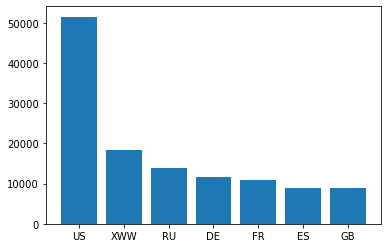

In [161]:
conn = sqlite3.connect('data\im.db') 
curr = conn.cursor() 
q = """SELECT * FROM movie_akas"""
aka_df = pd.read_sql(q,conn)
#aka_df['region'].unique()
region_counts = aka_df.region.value_counts()
fig, ax = plt.subplots()
sample_n = 7
ax.bar(region_counts.index[:sample_n], region_counts[:sample_n])
#region_counts

In [19]:
conn = sqlite3.connect('data\im.db') 
curr = conn.cursor() 

#get table names from db
q = """SELECT name FROM sqlite_master WHERE type='table';""" 
curr.execute(q) 
table_list = curr.fetchall()
table_names = []
for item in table_list:
    table_names.append(item[0])

#print out column names from each table
for name in table_names: #loop over tables
    print('**Table:**  ' + name)
    q = """SELECT * FROM """ + name
    curr.execute(q)
    print('Columns:  ')
    for desc in curr.description: #loop over column names
        print(desc[0])
    print(' \n')

**Table:**  movie_basics
Columns:  
movie_id
primary_title
original_title
start_year
runtime_minutes
genres
 

**Table:**  directors
Columns:  
movie_id
person_id
 

**Table:**  known_for
Columns:  
person_id
movie_id
 

**Table:**  movie_akas
Columns:  
movie_id
ordering
title
region
language
types
attributes
is_original_title
 

**Table:**  movie_ratings
Columns:  
movie_id
averagerating
numvotes
 

**Table:**  persons
Columns:  
person_id
primary_name
birth_year
death_year
primary_profession
 

**Table:**  principals
Columns:  
movie_id
ordering
person_id
category
job
characters
 

**Table:**  writers
Columns:  
movie_id
person_id
 



In [23]:
q = """
SELECT * FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;"""

df = pd.read_sql(q, conn)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [57]:
#collect unique list of genre names
genres = set() #define empty set
for labels in df.genres:
    if not(pd.isnull(labels)): #if entry isn't null
        genres = genres.union(set(labels.split(','))) #split string into genre names, take union with set of unique genres and store
genres = list(genres)
print(genres)

df_genres = pd.DataFrame(columns=genres, index=range(df.shape[0])) #set columns for genres
df_genres.loc[:,:] = 0 #initialize flags to zero

#df_genres['movie_id'] = df['movie_id'] #keep movie_id as primary index
#df_genres['averagerating'] = df['averagerating']
#df_genres['start_year'] = df['start_year']
column_keep = ['movie_id','averagerating','numvotes','start_year']
df_genres[column_keep] = df[column_keep]


for i in range(df.shape[0]): # loop over entries
    genre_str = df['genres'].loc[i]
    if not(pd.isnull(genre_str)): #if not null
        genre_str = genre_str.split(',') #get list of genres
        for genre in genre_str: #loop over genres
            df_genres.loc[i, genre] = 1 #set genre flag to 1

df_genres['sumrating'] = df_genres['averagerating']*df_genres['numvotes'] #multiply average rating by number of votes to get summed rating
df_genres.head()
    

['Drama', 'Fantasy', 'Documentary', 'Crime', 'Musical', 'Adult', 'War', 'Horror', 'Sport', 'Biography', 'News', 'Sci-Fi', 'Music', 'Thriller', 'Reality-TV', 'Comedy', 'Adventure', 'History', 'Romance', 'Mystery', 'Game-Show', 'Family', 'Animation', 'Western', 'Short', 'Action']


,Drama,Fantasy,Documentary,Crime,Musical,Adult,War,Horror,Sport,Biography,...,Mystery,Game-Show,Family,Animation,Western,Short,Action,movie_id,averagerating,start_year
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,tt0063540,7.0,2013
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,tt0066787,7.2,2019
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,tt0069049,6.9,2018
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,tt0069204,6.1,2018
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,tt0100275,6.5,2017


In [153]:



# grouped = df_genres[df_genres['Drama']==1].groupby('start_year').agg(['mean','count','std'])
# grouped

df_grouped = pd.DataFrame()

for genre in genres:
    group = df_genres[df_genres[genre]==1].groupby('start_year').agg(mean=('averagerating','mean'),
                                                                    sem=('averagerating','sem'),
                                                                    count=('averagerating','count'))
#     group = df_genres[df_genres[genre]==1].groupby('start_year').agg(rating_mean=('averagerating','mean'),
#                                                                     rating_sem=('averagerating','sem'),
#                                                                     rating_count=('averagerating','count'))
    # group.rename(columns={'rating_mean': genre+'_mean', 'rating_sem': genre+'_sem', 'rating_count': genre+'_count'}, inplace=True)
    print(genre)
    if df_grouped.empty: #if df is empty
        df_grouped = group.copy() #store group stats
        df_grouped.rename(columns={'mean': 'mean_'+genre, 'sem': 'sem_'+genre, 'count': 'count_'+genre}, inplace=True)
        
    else:
        group.rename(columns={'mean': 'mean_'+genre, 'sem': 'sem_'+genre, 'count': 'count_'+genre}, inplace=True)
        df_grouped = df_grouped.join(group, on='start_year')


df_grouped.columns


Drama
Index(['mean_Drama', 'sem_Drama', 'count_Drama'], dtype='object')
Fantasy
Index(['mean_Drama', 'sem_Drama', 'count_Drama', 'mean_Fantasy', 'sem_Fantasy',
       'count_Fantasy'],
      dtype='object')
Documentary
Index(['mean_Drama', 'sem_Drama', 'count_Drama', 'mean_Fantasy', 'sem_Fantasy',
       'count_Fantasy', 'mean_Documentary', 'sem_Documentary',
       'count_Documentary'],
      dtype='object')
Crime
Index(['mean_Drama', 'sem_Drama', 'count_Drama', 'mean_Fantasy', 'sem_Fantasy',
       'count_Fantasy', 'mean_Documentary', 'sem_Documentary',
       'count_Documentary', 'mean_Crime', 'sem_Crime', 'count_Crime'],
      dtype='object')
Musical
Index(['mean_Drama', 'sem_Drama', 'count_Drama', 'mean_Fantasy', 'sem_Fantasy',
       'count_Fantasy', 'mean_Documentary', 'sem_Documentary',
       'count_Documentary', 'mean_Crime', 'sem_Crime', 'count_Crime',
       'mean_Musical', 'sem_Musical', 'count_Musical'],
      dtype='object')
Adult
Index(['mean_Drama', 'sem_Drama', 'count

Index(['mean_Drama', 'sem_Drama', 'count_Drama', 'mean_Fantasy', 'sem_Fantasy',
       'count_Fantasy', 'mean_Documentary', 'sem_Documentary',
       'count_Documentary', 'mean_Crime', 'sem_Crime', 'count_Crime',
       'mean_Musical', 'sem_Musical', 'count_Musical', 'mean_Adult',
       'sem_Adult', 'count_Adult', 'mean_War', 'sem_War', 'count_War',
       'mean_Horror', 'sem_Horror', 'count_Horror', 'mean_Sport', 'sem_Sport',
       'count_Sport', 'mean_Biography', 'sem_Biography', 'count_Biography',
       'mean_News', 'sem_News', 'count_News', 'mean_Sci-Fi', 'sem_Sci-Fi',
       'count_Sci-Fi', 'mean_Music', 'sem_Music', 'count_Music',
       'mean_Thriller', 'sem_Thriller', 'count_Thriller', 'mean_Reality-TV',
       'sem_Reality-TV', 'count_Reality-TV', 'mean_Comedy', 'sem_Comedy',
       'count_Comedy', 'mean_Adventure', 'sem_Adventure', 'count_Adventure',
       'mean_History', 'sem_History', 'count_History', 'mean_Romance',
       'sem_Romance', 'count_Romance', 'mean_Mystery'

In [151]:
genres[1]

'Fantasy'

In [152]:
# grouped = df_genres[df_genres['Drama']==1].groupby('start_year').agg(['mean','count','std'])
# grouped

df_grouped = pd.DataFrame()

for genre in genres:
    group = df_genres[df_genres[genre]==1].groupby('start_year').agg(mean=('averagerating','mean'),
                                                                    sem=('averagerating','sem'),
                                                                    count=('averagerating','count'))
#     group = df_genres[df_genres[genre]==1].groupby('start_year').agg(rating_mean=('averagerating','mean'),
#                                                                     rating_sem=('averagerating','sem'),
#                                                                     rating_count=('averagerating','count'))
    # group.rename(columns={'rating_mean': genre+'_mean', 'rating_sem': genre+'_sem', 'rating_count': genre+'_count'}, inplace=True)
    if df_grouped.empty: #if df is empty
        group.rename(columns={'mean': 'mean_'+genre, 'sem': 'sem_'+genre, 'count': 'count_'+genre}, inplace=True)
        df_grouped = group #store group stats
        print(group)
    else:
        df_grouped = df_grouped.join(group, on='start_year', rsuffix="_"+genre)

df_grouped

            mean_Drama  sem_Drama  count_Drama
start_year                                    
2010          6.279256   0.023629         2902
2011          6.320640   0.022507         3096
2012          6.377732   0.021398         3175
2013          6.392679   0.021051         3497
2014          6.417824   0.021328         3529
2015          6.292808   0.020915         3629
2016          6.388533   0.021797         3523
2017          6.467298   0.021907         3483
2018          6.554584   0.024035         3054
2019          6.844889   0.046745          900


,mean_Drama,sem_Drama,count_Drama,mean,sem,count,mean_Documentary,sem_Documentary,count_Documentary,mean_Crime,...,count_Animation,mean_Western,sem_Western,count_Western,mean_Short,sem_Short,count_Short,mean_Action,sem_Action,count_Action
start_year,,,,,,,,,,,,,,,,,,,,,
2010,6.279256,0.023629,2902,5.889894,0.104025,188,7.299270,0.025878,1644,5.953302,...,150,6.124000,0.296158,25,NaN,NaN,NaN,5.692330,0.056042,691
2011,6.320640,0.022507,3096,5.827315,0.095105,216,7.295845,0.024976,1853,6.044206,...,199,5.480000,0.342284,30,NaN,NaN,NaN,5.731503,0.056365,692
2012,6.377732,0.021398,3175,6.060476,0.094328,210,7.247041,0.025454,1943,6.126216,...,167,6.164516,0.299014,31,NaN,NaN,NaN,5.880897,0.057116,691
2013,6.392679,0.021051,3497,5.784615,0.097571,221,7.237395,0.024050,2027,6.170414,...,169,5.781481,0.320080,27,NaN,NaN,NaN,5.707252,0.058947,717
2014,6.417824,0.021328,3529,5.741250,0.094297,240,7.324373,0.022816,2154,6.196756,...,191,6.500000,0.184961,39,NaN,NaN,NaN,5.868435,0.053266,773
2015,6.292808,0.020915,3629,5.839300,0.085076,257,7.338889,0.023901,2106,6.086059,...,196,5.671429,0.304154,28,NaN,NaN,NaN,5.728377,0.052278,807
2016,6.388533,0.021797,3523,5.947636,0.087491,275,7.386921,0.023176,2095,6.149069,...,196,5.620833,0.306510,24,NaN,NaN,NaN,5.816434,0.050757,858
2017,6.467298,0.021907,3483,6.006148,0.088389,244,7.390833,0.024563,2018,6.064662,...,210,5.505405,0.295891,37,NaN,NaN,NaN,5.885831,0.051934,854
2018,6.554584,0.024035,3054,6.102804,0.106886,214,7.429497,0.028054,1512,6.123898,...,204,5.712121,0.297106,33,8.8,NaN,1.0,5.853352,0.058986,701


In [142]:
df_genres['Fantasy'].sum()

2126

In [137]:
print(sorted(df_grouped.columns))
print(sorted(genres))


['count', 'count_Action', 'count_Adult', 'count_Adventure', 'count_Animation', 'count_Biography', 'count_Comedy', 'count_Crime', 'count_Documentary', 'count_Drama', 'count_Family', 'count_Game-Show', 'count_History', 'count_Horror', 'count_Music', 'count_Musical', 'count_Mystery', 'count_News', 'count_Reality-TV', 'count_Romance', 'count_Sci-Fi', 'count_Short', 'count_Sport', 'count_Thriller', 'count_War', 'count_Western', 'mean', 'mean_Action', 'mean_Adult', 'mean_Adventure', 'mean_Animation', 'mean_Biography', 'mean_Comedy', 'mean_Crime', 'mean_Documentary', 'mean_Drama', 'mean_Family', 'mean_Game-Show', 'mean_History', 'mean_Horror', 'mean_Music', 'mean_Musical', 'mean_Mystery', 'mean_News', 'mean_Reality-TV', 'mean_Romance', 'mean_Sci-Fi', 'mean_Short', 'mean_Sport', 'mean_Thriller', 'mean_War', 'mean_Western', 'sem', 'sem_Action', 'sem_Adult', 'sem_Adventure', 'sem_Animation', 'sem_Biography', 'sem_Comedy', 'sem_Crime', 'sem_Documentary', 'sem_Drama', 'sem_Family', 'sem_Game-Show'

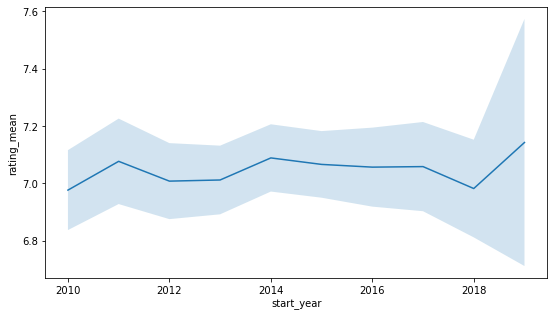

In [107]:
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=grouped, x='start_year', y='rating_mean',ci=None)
ax.fill_between(grouped.index, grouped['rating_mean']-2*grouped['rating_sem'], grouped['rating_mean']+2*grouped['rating_sem'], alpha=0.2)
plt.show()